<a href="https://colab.research.google.com/github/MahnoorFatimaZahid/placement_prediction-ml/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle


In [78]:
# Load dataset
df = pd.read_csv('/content/placement.csv')

# Drop first column (index-like column)
df = df.iloc[:, 1:]

# Quick look at the data
print(df.head())
print(df.info())


   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


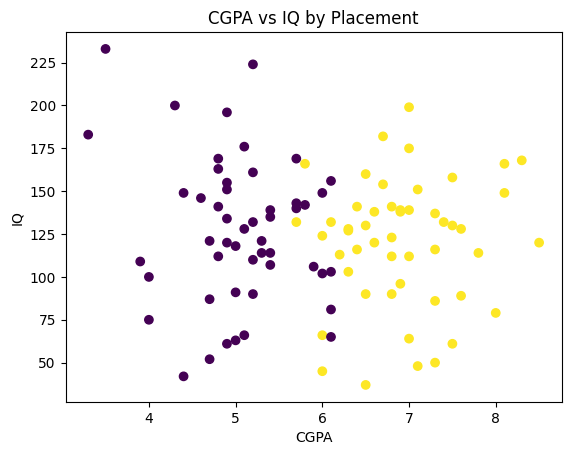

In [79]:
# Scatter plot of CGPA vs IQ, colored by placement
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("CGPA vs IQ by Placement")
plt.show()


In [80]:
# Features (X) and Target (y)
x = df.iloc[:, 0:2]   # first two columns: cgpa & iq
y = df.iloc[:, -1]    # last column: placement

print("Shape of X:", x.shape)
print("Shape of y:", y.shape)


Shape of X: (100, 2)
Shape of y: (100,)


In [82]:
# Train/Test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42
)

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [83]:
# Logistic Regression Model
clf = LogisticRegression()
clf.fit(x_train, y_train)


LogisticRegression()

In [84]:
# Predictions
y_pred = clf.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")


Model Accuracy: 0.80


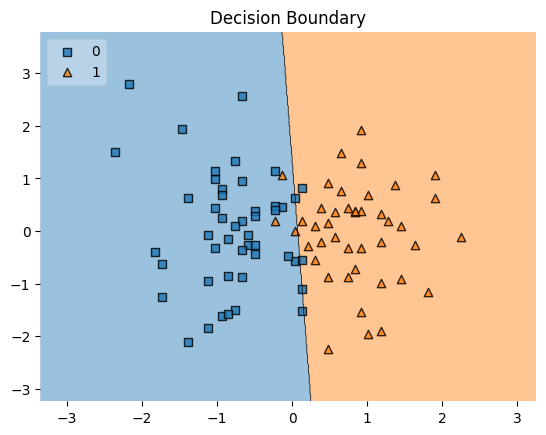

In [85]:
# Plot decision regions (using training data)
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)
plt.title("Decision Boundary")
plt.show()


In [86]:
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

# Load model
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test loaded model
print("Prediction from loaded model:", loaded_model.predict(x_test[:5]))


Prediction from loaded model: [1 1 1 0 1]
